In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rajbirahmed","key":"8c5a40b84190c48e398d4e8c4977d6f0"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d slothkong/10-monkey-species

Dataset URL: https://www.kaggle.com/datasets/slothkong/10-monkey-species
License(s): CC0-1.0


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/10-monkey-species.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import classification_report
import shutil

In [10]:
base_dir = '/content/'
train_dir = os.path.join(base_dir, 'training', 'training')
val_dir = os.path.join(base_dir, 'validation', 'validation')

In [11]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 10

In [12]:
# Step 4: Data generators
train_datagen_plain = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_plain = train_datagen_plain.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# Data Augmentation generator
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Found 1098 images belonging to 10 classes.


In [13]:
#ANN MODEL
def build_ann():
    model = models.Sequential([
        layers.Flatten(input_shape=IMG_SIZE + (3,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
#CNN Model
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# 5.3 VGG16 Transfer Learning
def build_vgg16():
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=IMG_SIZE + (3,))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
#Train ANN
ann_model = build_ann()
history_ann = ann_model.fit(train_generator_plain, epochs=10, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 618ms/step - accuracy: 0.1380 - loss: 29.3414 - val_accuracy: 0.1985 - val_loss: 3.2481
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 515ms/step - accuracy: 0.2599 - loss: 3.5951 - val_accuracy: 0.3566 - val_loss: 2.4037
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 499ms/step - accuracy: 0.4183 - loss: 2.1405 - val_accuracy: 0.3309 - val_loss: 2.4094
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 506ms/step - accuracy: 0.4353 - loss: 1.8221 - val_accuracy: 0.3088 - val_loss: 2.2956
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 551ms/step - accuracy: 0.4776 - loss: 1.5850 - val_accuracy: 0.4412 - val_loss: 1.7127
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 557ms/step - accuracy: 0.5843 - loss: 1.2432 - val_accuracy: 0.4301 - val_loss: 1.8774
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 517ms/step - accuracy: 0.6590 - loss: 1.1307 - val_accuracy: 0.4449 - val_loss: 1.8724
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 535ms/step - accuracy: 0.6706 - loss: 1.1100 - val_acc

In [17]:
#Train CNN without augmentation
cnn_model = build_cnn()
history_cnn_plain = cnn_model.fit(train_generator_plain, epochs=10, validation_data=val_generator)

#Train CNN with augmentation
cnn_model_aug = build_cnn()
history_cnn_aug = cnn_model_aug.fit(train_generator_aug, epochs=10, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 641ms/step - accuracy: 0.1056 - loss: 3.1139 - val_accuracy: 0.2868 - val_loss: 1.9863
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 512ms/step - accuracy: 0.3848 - loss: 1.7232 - val_accuracy: 0.4926 - val_loss: 1.5632
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 533ms/step - accuracy: 0.6079 - loss: 1.1541 - val_accuracy: 0.5625 - val_loss: 1.3027
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 522ms/step - accuracy: 0.7520 - loss: 0.7805 - val_accuracy: 0.5993 - val_loss: 1.1728
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 541ms/step - accuracy: 0.8363 - loss: 0.4189 - val_accuracy: 0.6176 - val_loss: 1.3250
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 520ms/step - accuracy: 0.9188 - loss: 0.3023 - val_accuracy: 0.6176 - val_loss: 1.4392
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 542ms/step - accuracy: 0.9821 - loss: 0.0867 - val_accuracy: 0.6434 - val_loss: 1.7103
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 513ms/step - accuracy: 0.9900 - loss: 0.0600 - val_accu

In [18]:
#Train VGG16 without augmentation
vgg_model = build_vgg16()
history_vgg_plain = vgg_model.fit(train_generator_plain, epochs=10, validation_data=val_generator)

#Train VGG16 with augmentation
vgg_model_aug = build_vgg16()
history_vgg_aug = vgg_model_aug.fit(train_generator_aug, epochs=10, validation_data=val_generator)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 829ms/step - accuracy: 0.2646 - loss: 3.1818 - val_accuracy: 0.6213 - val_loss: 1.1244
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 553ms/step - accuracy: 0.7825 - loss: 0.6917 - val_accuracy: 0.6801 - val_loss: 0.9485
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 542ms/step - accuracy: 0.9139 - loss: 0.3544 - val_accuracy: 0.7610 - val_loss: 0.7468
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 526ms/step - accuracy: 0.9787 - loss: 0.1558 - val_accuracy: 0.8199 - val_loss: 0.7620
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 729ms/step - accuracy: 0.9950 - loss: 0.0754 - val_accuracy: 0.7757 - val_loss: 0.6944
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 553ms/step - accuracy: 1.0000 - loss: 0.0418 - val_accuracy: 0.7684 - val_loss: 0.6765
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 546ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.7794 - val_loss: 0.6682
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 573m

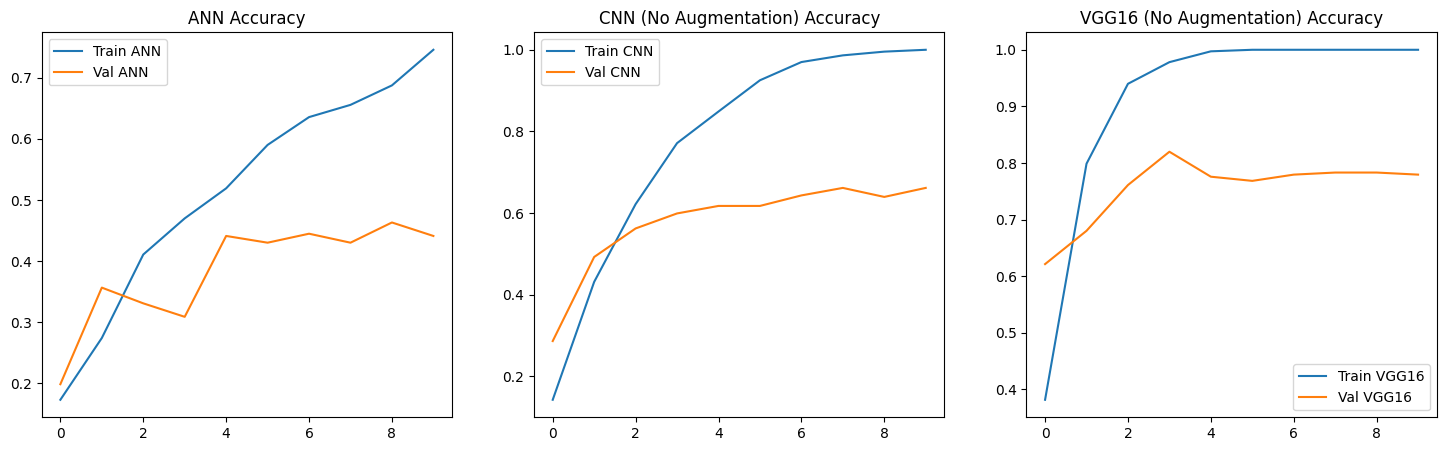

In [19]:
#Plot Accuracy Curves
fig, axs = plt.subplots(1, 3, figsize=(18,5))

axs[0].plot(history_ann.history['accuracy'], label='Train ANN')
axs[0].plot(history_ann.history['val_accuracy'], label='Val ANN')
axs[0].legend()
axs[0].set_title('ANN Accuracy')

axs[1].plot(history_cnn_plain.history['accuracy'], label='Train CNN')
axs[1].plot(history_cnn_plain.history['val_accuracy'], label='Val CNN')
axs[1].legend()
axs[1].set_title('CNN (No Augmentation) Accuracy')

axs[2].plot(history_vgg_plain.history['accuracy'], label='Train VGG16')
axs[2].plot(history_vgg_plain.history['val_accuracy'], label='Val VGG16')
axs[2].legend()
axs[2].set_title('VGG16 (No Augmentation) Accuracy')

plt.show()

In [20]:
#Find best model
val_acc = [
    max(history_ann.history['val_accuracy']),
    max(history_cnn_plain.history['val_accuracy']),
    max(history_vgg_plain.history['val_accuracy'])
]

best_model_idx = np.argmax(val_acc)
models_list = ['ANN', 'CNN', 'VGG16']
print(f"Best model is: {models_list[best_model_idx]} with validation accuracy: {val_acc[best_model_idx]:.4f}")


Best model is: VGG16 with validation accuracy: 0.8199


In [21]:
#Classification Report for Best Model
best_model = [ann_model, cnn_model, vgg_model][best_model_idx]

# Generate predictions
val_generator.reset()
Y_pred = best_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=list(val_generator.class_indices.keys())))

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step
Classification Report:
              precision    recall  f1-score   support

          n0       0.17      0.15      0.16        26
          n1       0.07      0.07      0.07        28
          n2       0.10      0.11      0.10        27
          n3       0.14      0.17      0.15        30
          n4       0.04      0.04      0.04        26
          n5       0.08      0.07      0.07        28
          n6       0.08      0.08      0.08        26
          n7       0.11      0.11      0.11        28
          n8       0.11      0.11      0.11        27
          n9       0.08      0.08      0.08        26

    accuracy                           0.10       272
   macro avg       0.10      0.10      0.10       272
weighted avg       0.10      0.10      0.10       272



In [23]:
#Hyperparameter tuning (example: smaller learning rate)
tuned_model = None
if models_list[best_model_idx] == 'CNN':
    tuned_model = build_cnn()
elif models_list[best_model_idx] == 'VGG16':
    tuned_model = build_vgg16()
else:
    tuned_model = build_ann()

#Compile with lower learning rate
tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy', metrics=['accuracy'])

history_tuned = tuned_model.fit(train_generator_plain, epochs=10, validation_data=val_generator)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 631ms/step - accuracy: 0.2325 - loss: 2.1871 - val_accuracy: 0.5294 - val_loss: 1.4749
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 579ms/step - accuracy: 0.7022 - loss: 1.1518 - val_accuracy: 0.6618 - val_loss: 1.0891
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 542ms/step - accuracy: 0.8229 - loss: 0.7280 - val_accuracy: 0.7353 - val_loss: 0.9449
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 543ms/step - accuracy: 0.9158 - loss: 0.4846 - val_accuracy: 0.7096 - val_loss: 0.8538
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 537ms/step - accuracy: 0.9606 - loss: 0.3319 - val_accuracy: 0.7463 - val_loss: 0.7815
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 559ms/step - accuracy: 0.9905 - loss: 0.2406 - val_accuracy: 0.7721 - val_loss: 0.7246
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 548ms/step - accuracy: 0.9963 - loss: 0.1763 - val_accuracy: 0.7757 - val_loss: 0.6967
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 568ms/step - accuracy: 0.9960 - loss: 0.1409 - val_accu

In [24]:
#Compare improvements
old_acc = val_acc[best_model_idx]
new_acc = max(history_tuned.history['val_accuracy'])

improvement = ((new_acc - old_acc) / old_acc) * 100
print(f"Validation accuracy improved from {old_acc:.4f} to {new_acc:.4f} ({improvement:.2f}% improvement).")

Validation accuracy improved from 0.8199 to 0.7904 (-3.59% improvement).
